<a href="https://colab.research.google.com/github/MammadovN/Machine_Learning/blob/main/projects/03_deep_learning/autoencoders/autoencoder_denoising/Denoising_Autoencoder_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [2]:
def add_noise(images, noise_factor=0.5):
    noisy = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    noisy = np.clip(noisy, 0., 1.)
    return noisy

In [3]:
# Load and prepare the data
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Create noisy versions of the data
x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Autoencoder architecture
input_img = Input(shape=(28, 28, 1))  # Input layer for 28x28 grayscale images
x = Flatten()(input_img)              # Flatten the input to a 1D vector
x = Dense(128, activation='relu')(x)  # First dense layer
x = Dense(64, activation='relu')(x)   # Second dense layer
encoded = Dense(32, activation='relu')(x)  # Bottleneck layer (compressed representation)

x = Dense(64, activation='relu')(encoded)   # First decoder dense layer
x = Dense(128, activation='relu')(x)        # Second decoder dense layer
x = Dense(784, activation='sigmoid')(x)     # Output layer with 784 units (28x28)
decoded = Reshape((28, 28, 1))(x)           # Reshape output back to image shape

autoencoder = Model(input_img, decoded)     # Define the model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')  # Compile the model

In [5]:
# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = autoencoder.fit(
    x_train_noisy, x_train,          # Input is noisy images, target is clean images
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_split=0.1,            # Use 10% of training data for validation
    callbacks=[early_stop],          # Stop early if no improvement in validation loss
    verbose=1
)

Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0715 - val_loss: 0.0291
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0276 - val_loss: 0.0260
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0245 - val_loss: 0.0235
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0229 - val_loss: 0.0223
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0216 - val_loss: 0.0213
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0208 - val_loss: 0.0208
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0203 - val_loss: 0.0203
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0199 - val_loss: 0.0201
Epoch 9/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0194 - val_loss: 0.0196
Epoch 10/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0191 - val_loss: 0.0194
Epoch 11/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0187 - val_loss: 0.0191
Epoch 12/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/st

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


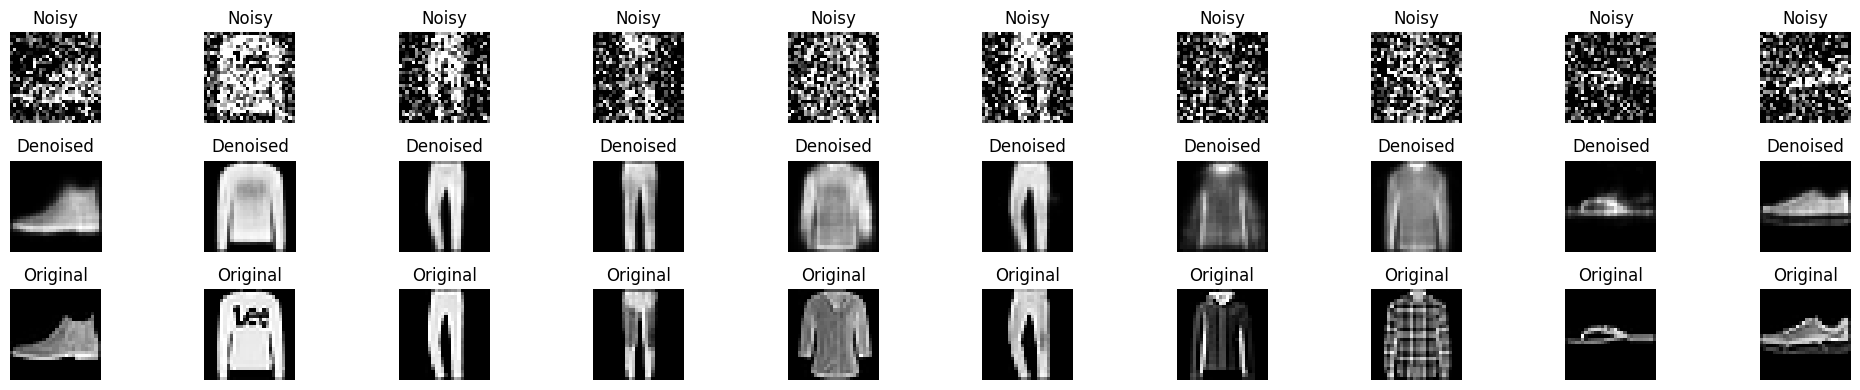

In [6]:
# Predict denoised images from the test set
decoded_imgs = autoencoder.predict(x_test_noisy)

# Plot original, noisy, and denoised images
n = 10  # number of samples to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Noisy input
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.title("Noisy")
    plt.axis("off")

    # Reconstructed (denoised) output
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Denoised")
    plt.axis("off")

    # Original clean image
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

plt.tight_layout()
plt.show()